## Convolutions

**Convolutions** are a key transformation in CNNs. In this notebook we will implement various flavours of convolution operation from scratch.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Size of image=197.65kb


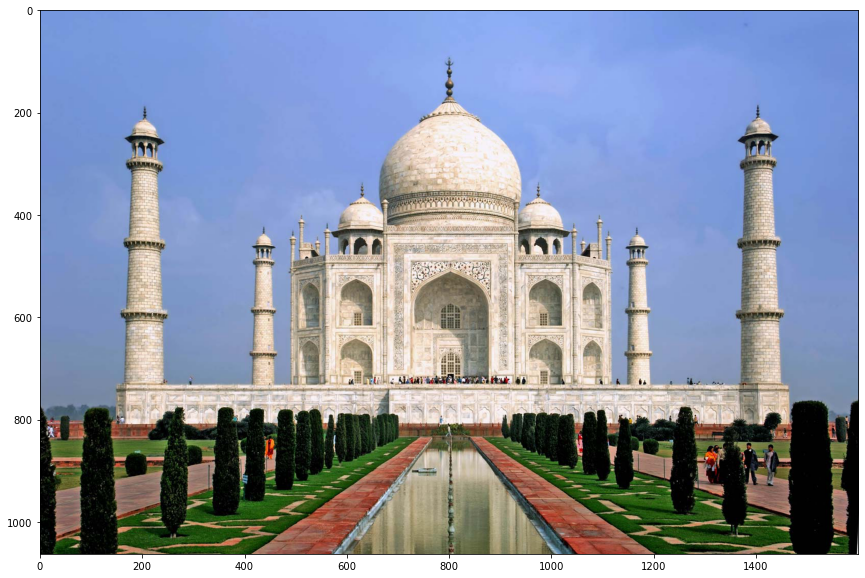

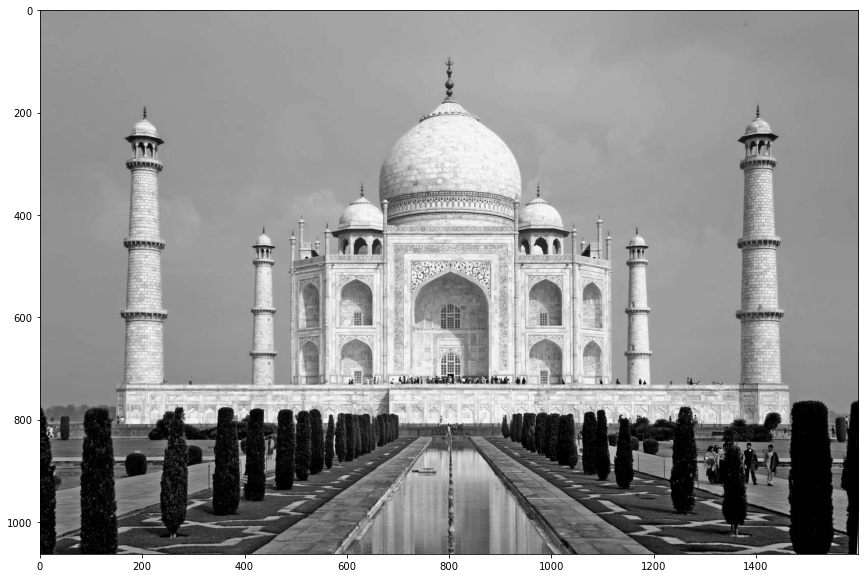

In [4]:
#Lets load an image
from PIL import Image
import matplotlib.pyplot as plt
import os

path = 'test.jpg'
img = Image.open(path)
s = float(os.path.getsize(path))/1024
print(f"Size of image={s:0.2f}kb")
plt.figure(figsize=(20,10))
plt.imshow(img)

imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(20,10))
plt.imshow(imgmat, cmap = 'gray')

In [24]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((pad, pad), (pad, pad)), mode='constant', constant_values=(0,0))
    return X_pad

In [29]:
def conv(imgmat, input_filter, stride, pad):
    (n_H, n_W) = imgmat.shape
    (f, f) = input_filter.shape
    n_H_out = int((n_H + 2*pad - f)  / stride ) + 1
    n_W_out = int((n_W + 2*pad - f)  / stride ) + 1
    Z = np.zeros((n_H_out, n_W_out))
    
    #Pad the image
    imgmat_pad = zero_pad(imgmat, pad)
    
    for h in range(0, n_H_out):           
        vert_start = h*stride
        vert_end = vert_start + f    
        for w in range(n_W_out):      
            horiz_start = w*stride
            horiz_end = horiz_start+f
            imgmat_pad_slice = imgmat_pad[vert_start:vert_end, horiz_start:horiz_end]
            Z[h, w] = np.sum(imgmat_pad_slice * input_filter)
            
    assert(Z.shape == (n_H_out, n_W_out))
    return Z

**Vertical Edge Filter** 

In [34]:
vertical_edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
Z = conv(imgmat, input_filter, 1, 0)

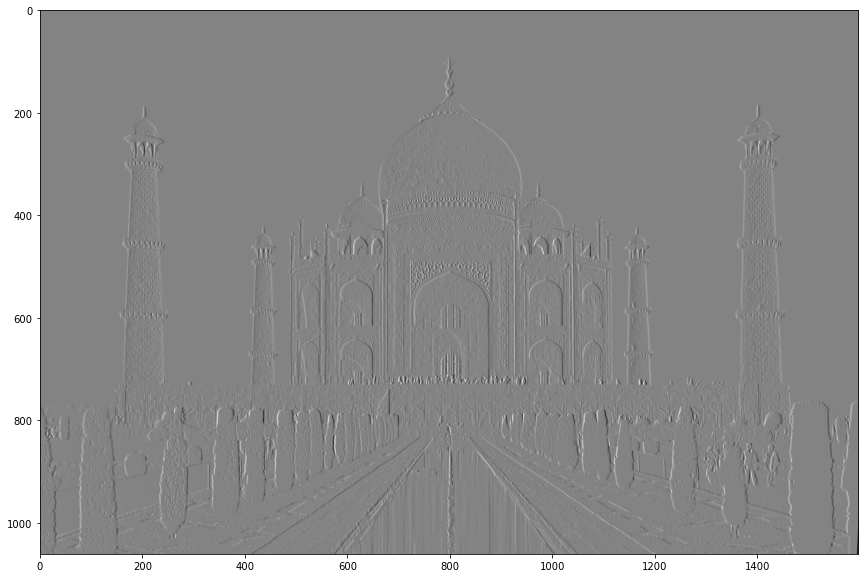

In [35]:
plt.figure(figsize=(20,10))
plt.imshow(Z, cmap = 'gray')

**Sobel Filter**

In [37]:
sobel_filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Z = conv(imgmat, sobel_filter, 1, 0)

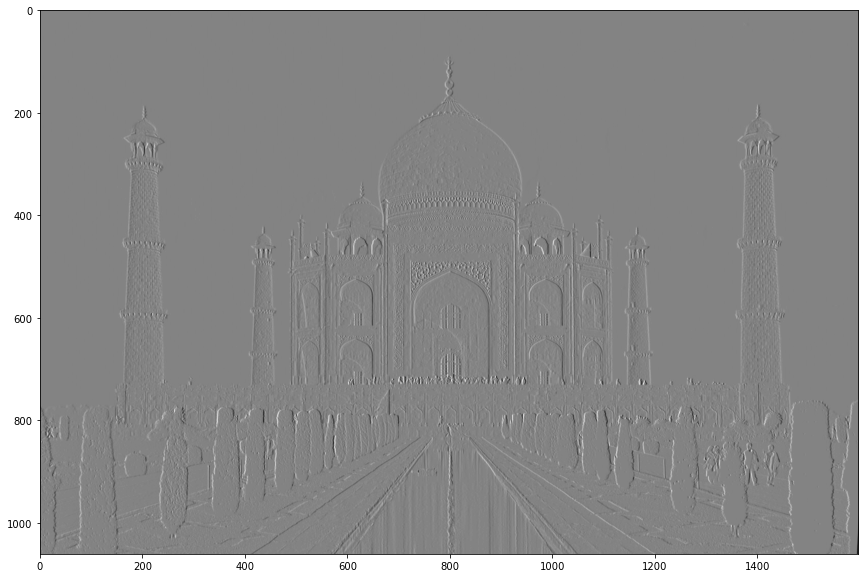

In [38]:
plt.figure(figsize=(20,10))
plt.imshow(Z, cmap = 'gray')

**Horizontal Edge Filter**

In [39]:
horizontal_edge_filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
Z = conv(imgmat, horizontal_edge_filter, 1, 0)

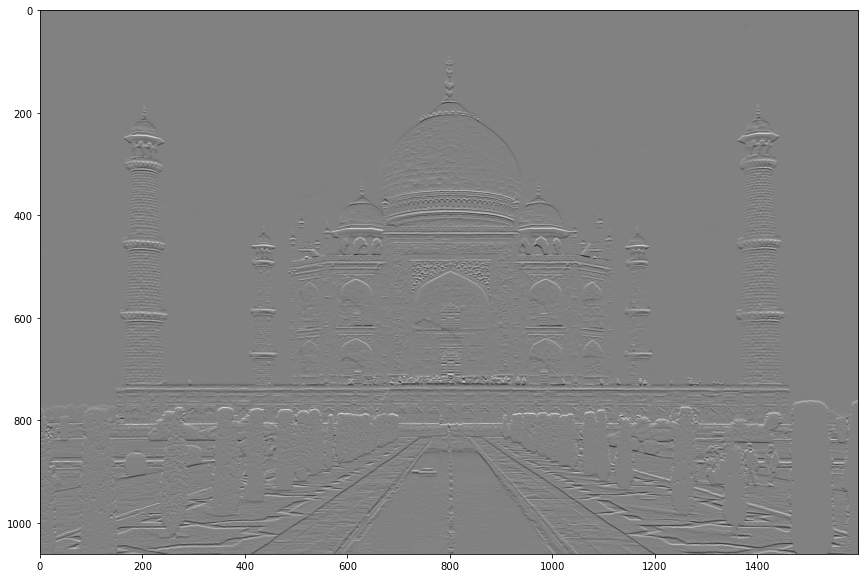

In [40]:
plt.figure(figsize=(20,10))
plt.imshow(Z, cmap = 'gray')

**Vertical filter with stride**

In [41]:
vertical_edge_filter = np.array([[1,0,0,0,-1],[1,0,0,0,-1],[1,0,0,0,-1],[1,0,0,0,-1],[1,0,0,0,-1]])
Z = conv(imgmat, input_filter, 2, 0)

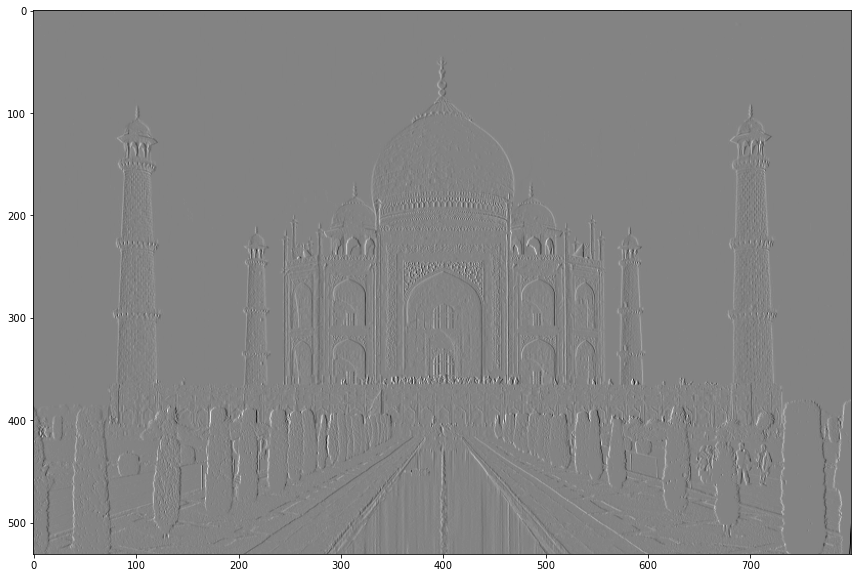

In [42]:
plt.figure(figsize=(20,10))
plt.imshow(Z, cmap = 'gray')